### Triple Ten Project Ddescription

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from scipy.stats import ttest_ind

## Load data

In [2]:
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
print("Plans DataFrame Summary:")
print("Shape:", plans_df.shape)
print()
print("Column Names:", plans_df.columns)
print()
print("Data Types:", plans_df.dtypes)
print()
display("First 5 Rows:", plans_df.head())
print()
plans_df.info()
print()
display("Descriptive Statistics:",plans_df.describe())
print()
print("Non-Null Values Count:" , plans_df.isnull().sum())    
# Print the general/summary information about the plans' DataFrame

Plans DataFrame Summary:
Shape: (2, 8)

Column Names: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

Data Types: messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object



'First 5 Rows:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



'Descriptive Statistics:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000



Non-Null Values Count: messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [4]:
plans_sample = plans_df.sample(frac=0.2, random_state=42)
print(plans_sample)
# Print a sample of data for plans

Empty DataFrame
Columns: [messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute, plan_name]
Index: []


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?] 

<b>Although the shape of the plans_df DataFrame is 2 rows and 5 columns, it provides us with the prices for the services prodided and well as the plans pricing structures. There is no need to fix or enrich the data as all columns are correctly formatted and you can see just from printing the head that there no null or duplicated values in the plans_df data_frame.</b>

## Plans Fix data

[Fix obvious issues with the data given the initial observations.] I do not find any issues with this DataFrame.

## Plans Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [5]:
print("Users DataFrame Summary:")
print()
print("Shape:", users_df.shape)
print()
print("Column Names:", users_df.columns)
print()
print("Data Types:", users_df.dtypes)
print()
display("First 5 Rows:", users_df.head())
print()
display("Last 5 Rows:", users_df.tail())
print()
print()
users_df.info()
print()
display("Descriptive Statistics:", users_df.describe())
print()
print("Null Values Count:" , users_df.isnull().sum())

Users DataFrame Summary:

Shape: (500, 8)

Column Names: Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

Data Types: user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object



'First 5 Rows:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


'Last 5 Rows:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



'Descriptive Statistics:'

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



Null Values Count: user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [6]:
print(users_df.sample(frac=0.2, random_state=42))# Print a sample of data for users

     user_id first_name  last_name  age  \
361     1361    Jacelyn    Hoffman   45   
73      1073      Grady   Crawford   30   
374     1374      Ching      Watts   55   
155     1155     Claude       Hahn   19   
104     1104    Thurman   Stephens   20   
..       ...        ...        ...  ...   
347     1347       Trey      Lynch   65   
86      1086      Adena     Macias   36   
75      1075     Salena      Bates   35   
438     1438     Harvey     Brooks   36   
15      1015      Beata  Carpenter   26   

                                                city    reg_date      plan  \
361                        Birmingham-Hoover, AL MSA  2018-04-14      surf   
73            Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-04-06      surf   
374           Louisville/Jefferson County, KY-IN MSA  2018-02-14      surf   
155    Miami-Fort Lauderdale-West Palm Beach, FL MSA  2018-02-21  ultimate   
104           Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-12-23  ultimate   
..             

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?] 
Student's Comment: 
1. The DataFrame has 500 rows and 8 columns.
1. Column Names are properly formated.
2. The reg_date and churn_data columns have a data type of object
3. The dtaframe Range Index is 500 (0 to 499)
4. Columns Index 0 to 6 have 500 non_null values; column index 7 has 34 non_null values.
5. The data type for column user_id is int 64.
6. There are no duplicates in the users_df DataFrame.

### Users Fix Data

[Fix obvious issues with the data given the initial observations.]

In [7]:
# Fixing null entries and data type for the churn_data column entries
# Converting churn_date to datetime
print()
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')
# Checking the data type
print("churn_date Data Type:", users_df['churn_date'].dtype)

print()

# Dropping NaT values
churned_users_df = users_df.dropna(subset=['churn_date'])
# Displaying the first 5 rows
display(churned_users_df.head())

print()

# Fixing data type for the reg_data column entries.
# Converting reg_date to datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], errors='coerce')
# Checking the data type
print("reg_date Data Type:" , users_df['reg_date'].dtype)

print()

# Converting user_id to string type
users_df['user_id'] = users_df['user_id'].astype(str)
# Verifing the change
print("user_id Data Type:" , users_df['user_id'].dtype)


churn_date Data Type: datetime64[ns]



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07



reg_date Data Type: datetime64[ns]

user_id Data Type: object


### Users Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [8]:
# Checking for duplicates
duplicates = users_df.duplicated()

# Printing the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Calls

In [9]:
print("Calls DataFrame Summary:")
print()
print("Shape:", calls_df.shape)
print()
print("Column Names:", calls_df.columns)
print()
print("Data Types:", calls_df.dtypes)
print()
display("First 5 Rows:", calls_df.head())
print()
display("Last 5 Rows:", calls_df.tail())
print()
calls_df.info()
print()
display("Descriptive Statistics:", calls_df.describe())
print()
print("Null Values Count:" , calls_df.isnull().sum())
# Print the general/summary information about the calls' DataFrame

Calls DataFrame Summary:

Shape: (137735, 4)

Column Names: Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

Data Types: id            object
user_id        int64
call_date     object
duration     float64
dtype: object



'First 5 Rows:'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


'Last 5 Rows:'

,id,user_id,call_date,duration
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37
137734,1499_203,1499,2018-12-29,13.86



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



'Descriptive Statistics:'

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



Null Values Count: id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [10]:
# Print a sample of data for calls
calls_sample = calls_df.sample(frac=0.2, random_state=42)
print(calls_sample)

              id  user_id   call_date  duration
52288   1187_481     1187  2018-12-12      0.00
30634   1114_568     1114  2018-10-21      1.05
54228   1196_106     1196  2018-07-23      5.67
110372  1389_454     1389  2018-05-12     11.49
109600   1386_60     1386  2018-11-24      0.00
...          ...      ...         ...       ...
114725  1401_593     1401  2018-11-02     11.22
128052   1460_45     1460  2018-10-23     17.63
84638   1312_130     1312  2018-08-26     10.79
34639   1130_159     1130  2018-12-25      0.30
118627  1412_911     1412  2018-08-14      7.30

[27547 rows x 4 columns]


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?
<b>
    
1. The call dataframe has 137735 rows and 4 columns   
2. The column names are correctly formated.
3. The user_id column should be of string type.
   The caller_id column should be of date type.
4. There are no null values in any of the columns of the Calls DataFrame
5. There are no duplicates in the calls_df DataFrame.
</b>

### Calls Fix data

[Fix obvious issues with the data given the initial observations.]

In [11]:
# Converting user_id to string type
calls_df['user_id'] = calls_df['user_id'].astype(str)
# Verifing the change
print("user_id Data Type:" , calls_df['user_id'].dtype)

print()

# Fixing data type for the reg_data column entries.
# Converting reg_date to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], errors='coerce')
# Checking the data type
print("call_date Data Type:" , calls_df['call_date'].dtype)

user_id Data Type: object

call_date Data Type: datetime64[ns]


### Calls Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [12]:
# Checking for duplicates
duplicates = calls_df.duplicated()

# Printing the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Rounding up the duration of each call
calls_df['duration'] = np.ceil(calls_df['duration'])

# Displaying the updated DataFrame
print(calls_df.head())

Number of duplicate rows: 0
         id user_id  call_date  duration
0   1000_93    1000 2018-12-27       9.0
1  1000_145    1000 2018-12-27      14.0
2  1000_247    1000 2018-12-27      15.0
3  1000_309    1000 2018-12-28       6.0
4  1000_380    1000 2018-12-30       5.0


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
print("Messages DataFrame Summary:")
print()
print("Shape:", messages_df.shape)
print()
print("Column Names:", messages_df.columns)
print()
print("Data Types:", messages_df.dtypes)
print()
display("First 5 Rows:", messages_df.head())
print()
display("Last 5 Rows:", messages_df.tail())
print()
messages_df.info()
print()
display("Descriptive Statistics:",messages_df.describe())
print()
print("Non-Null Values Count:" , messages_df.isnull().sum())

Messages DataFrame Summary:

Shape: (76051, 3)

Column Names: Index(['id', 'user_id', 'message_date'], dtype='object')

Data Types: id              object
user_id          int64
message_date    object
dtype: object



'First 5 Rows:'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


'Last 5 Rows:'

,id,user_id,message_date
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24
76050,1497_613,1497,2018-12-23



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



'Descriptive Statistics:'

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000



Non-Null Values Count: id              0
user_id         0
message_date    0
dtype: int64


In [14]:
calls_sample = calls_df.sample(frac=0.2, random_state=42)
print(calls_sample)# Print a sample of data for messages

              id user_id  call_date  duration
52288   1187_481    1187 2018-12-12       0.0
30634   1114_568    1114 2018-10-21       2.0
54228   1196_106    1196 2018-07-23       6.0
110372  1389_454    1389 2018-05-12      12.0
109600   1386_60    1386 2018-11-24       0.0
...          ...     ...        ...       ...
114725  1401_593    1401 2018-11-02      12.0
128052   1460_45    1460 2018-10-23      18.0
84638   1312_130    1312 2018-08-26      11.0
34639   1130_159    1130 2018-12-25       1.0
118627  1412_911    1412 2018-08-14       8.0

[27547 rows x 4 columns]


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
Student's Comments:
1. The Messages DataFrame has 76051 and 3 columns.
2. The 'user_id' column is of int64 type.
3. The 'message_date column is of object type.
4. There are no null values in any of the columns of the Messages DataFrame.
5. There are no duplicates in the messages_df DataFrame.

### Messages Fix data

[Fix obvious issues with the data given the initial observations.]

In [15]:
# Converting user_id to string type
messages_df['user_id'] = messages_df['user_id'].astype(str)
# Verifing the change
print("user_id Data Type:" , calls_df['user_id'].dtype)

print()

# Fixing data type for the reg_data column entries.
# Converting reg_date to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], errors='coerce')
# Checking the data type
print("message_date Data Type:" , messages_df['message_date'].dtype)

user_id Data Type: object

message_date Data Type: datetime64[ns]


### Messages Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [16]:
# Checking for duplicates
duplicates = messages_df.duplicated()

# Printing the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Internet

In [17]:
print("Internet DataFrame Summary:")
print()
print("Shape:", internet_df.shape)
print()
print("Column Names:", internet_df.columns)
print()
print("Data Types:", internet_df.dtypes)
print()
display("First 5 Rows:", internet_df.head())
print()
display("Last 5 Rows:", internet_df.tail())
print()
internet_df.info()
print()
display("Descriptive Statistics:",internet_df.describe())
print()
print("Null Values Count:" , internet_df.isnull().sum())
# Print the general/summary information about the internet DataFrame

Internet DataFrame Summary:

Shape: (104825, 4)

Column Names: Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

Data Types: id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object



'First 5 Rows:'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


'Last 5 Rows:'

,id,user_id,session_date,mb_used
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00
104824,1499_219,1499,2018-12-24,758.31



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



'Descriptive Statistics:'

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000



Null Values Count: id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [18]:
internet_sample = internet_df.sample(frac=0.2, random_state=42)
print(internet_sample)# Print a sample of data for the internet traffic

              id  user_id session_date  mb_used
102423  1490_238     1490   2018-10-15   373.01
12472   1060_181     1060   2018-09-14   875.38
91959    1426_53     1426   2018-12-29   627.48
42208   1187_385     1187   2018-09-20   132.80
64201   1294_122     1294   2018-10-29   397.70
...          ...      ...          ...      ...
6830    1039_105     1039   2018-12-29   416.84
43349   1193_157     1193   2018-08-18   526.32
24661   1113_297     1113   2018-08-17   292.44
18500   1082_222     1082   2018-06-25   480.06
12944   1061_441     1061   2018-12-23   583.58

[20965 rows x 4 columns]


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Student's Comments:
1. The Internet Data Frame has 104825 rows and 4 columns
2. The column names are correctly formated.
3. The user_id column is of int64 type.
4. The session_date is of object type
5. There are no null values in any of the columns of the Internet DataFrame
6. There are no duplicates in the internet_df DataFrame.

### Internet Fix Data

[Fix obvious issues with the data given the initial observations.]

In [19]:
# Converting user_id to string type
internet_df['user_id'] = internet_df['user_id'].astype(str)
# Verifing the change
print("user_id Data Type:" , internet_df['user_id'].dtype)

print()

# Fixing data type for the reg_data column entries.
# Converting reg_date to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], errors='coerce')
# Checking the data type
print("session_date Data Type:" , internet_df['session_date'].dtype)

user_id Data Type: object

session_date Data Type: datetime64[ns]


### Internet Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [20]:
# Checking for duplicates
duplicates = internet_df.duplicated()

# Printing the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [21]:
display(plans_df)# Print out the plan conditions and make sure they are clear for you

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [22]:
# Calculate the number of calls made by each user per month. Save the result.

# Extracting month and year from the message_date
calls_df['month'] = calls_df['call_date'].dt.month

# Calculating the number of calls made by each user per month
monthly_calls_count = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_made')

display(monthly_calls_count.head())

,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Extracting month from the call_date
calls_df['month'] = calls_df['call_date'].dt.month

# Calculating the total duration of calls for each user per month
monthly_duration = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_duration')

display(monthly_duration.head())

,user_id,month,total_duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.

# Extracting month and year from the message_date
messages_df['month'] = messages_df['message_date'].dt.month

# Calculating the number of messages sent by each user per month
monthly_messages_count = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

display(monthly_messages_count.head())

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Extracting month from the session_date
internet_df['month'] = internet_df['session_date'].dt.month

# Calculate the total internet traffic used by each user per month
monthly_traffic_volume = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')

display(monthly_traffic_volume.head())

,user_id,month,total_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merging calls and minutes
merged_data = pd.merge(monthly_calls_count, monthly_duration, on=['user_id', 'month'], how='outer')

# Merging with messages
merged_data = pd.merge(merged_data, monthly_messages_count, on=['user_id', 'month'], how='outer')

# Merging with minutes
merged_data = pd.merge(merged_data, monthly_traffic_volume, on=['user_id', 'month'], how='outer')

# Display the merged DataFrame
display(merged_data.head())

,user_id,month,calls_made,total_duration,messages_sent,total_mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [27]:
# Add the plan information
merged_data = merged_data.merge(users_df, on='user_id', how='left')
final_data = merged_data.merge(plans_df, left_on='plan', right_on='plan_name', how='left')
# Display the final DataFrame
display(final_data.head())

,user_id,month,calls_made,total_duration,messages_sent,total_mb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]


In [28]:
def calculate_monthly_revenue(row):
    # Calculating overages
    call_overage = max(0, row['calls_made'] - row['minutes_included'])
    message_overage = max(0, row['messages_sent'] - row['messages_included'])
    data_overage = max(0, (row['total_mb_used'] - row['mb_per_month_included']) / 1024)  # Convert MB to GB
    
    # Calculating costs
    call_cost = call_overage * row['usd_per_minute']
    message_cost = message_overage * row['usd_per_message']
    data_cost = data_overage * row['usd_per_gb']
    
    # Total revenue calculation
    total_revenue = row['usd_monthly_pay'] + call_cost + message_cost + data_cost
    return total_revenue

# Applying the function to calculate monthly revenue
final_data['monthly_revenue'] = final_data.apply(calculate_monthly_revenue, axis=1)

# Displaying the results
display(final_data[['user_id', 'month', 'monthly_revenue']])

,user_id,month,monthly_revenue
0,1000,12,70.000000
1,1001,8,20.000000
2,1001,9,20.000000
3,1001,10,88.161191
4,1001,11,50.706055
...,...,...,...
2288,1349,12,20.330000
2289,1361,5,20.000000
2290,1482,10,70.000000
2291,1108,12,70.000000


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [29]:
display(final_data.head())

,user_id,month,calls_made,total_duration,messages_sent,total_mb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,8,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,9,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,50.706055


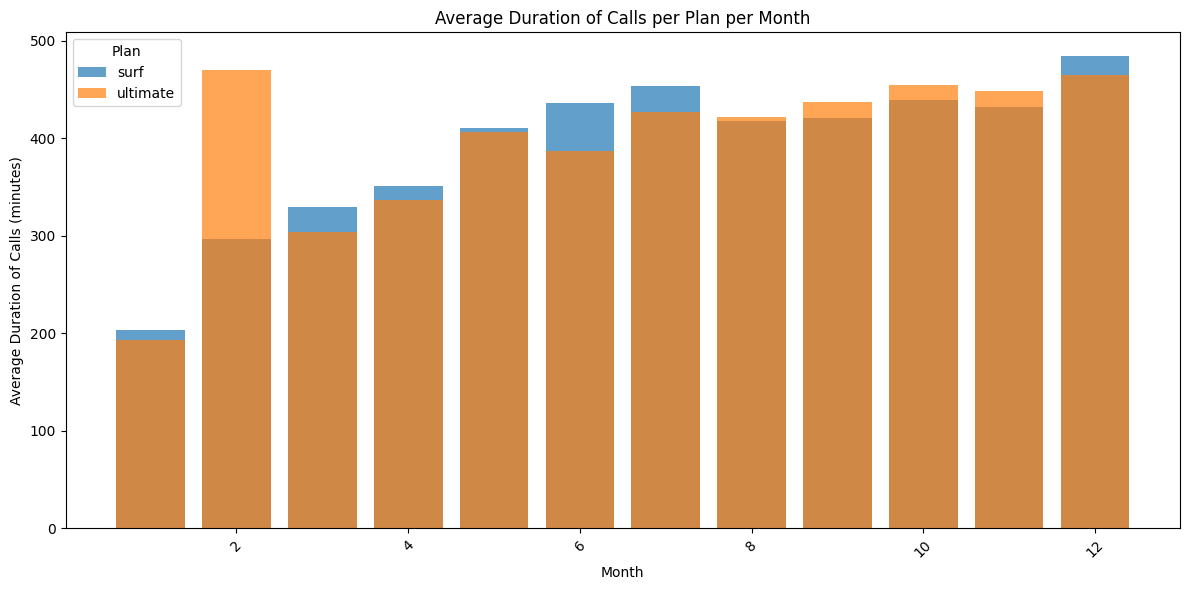

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

#Grouping by plan and month, then calculate the average duration of calls
average_duration = final_data.groupby(['plan', 'month'])['total_duration'].mean().reset_index()

# Creating a bar plot
plt.figure(figsize=(12, 6))

# Plotting each plan separately
for plan in average_duration['plan'].unique():
    subset = average_duration[average_duration['plan'] == plan]
    plt.bar(subset['month'], subset['total_duration'], label=plan, alpha=0.7)

plt.title('Average Duration of Calls per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration of Calls (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

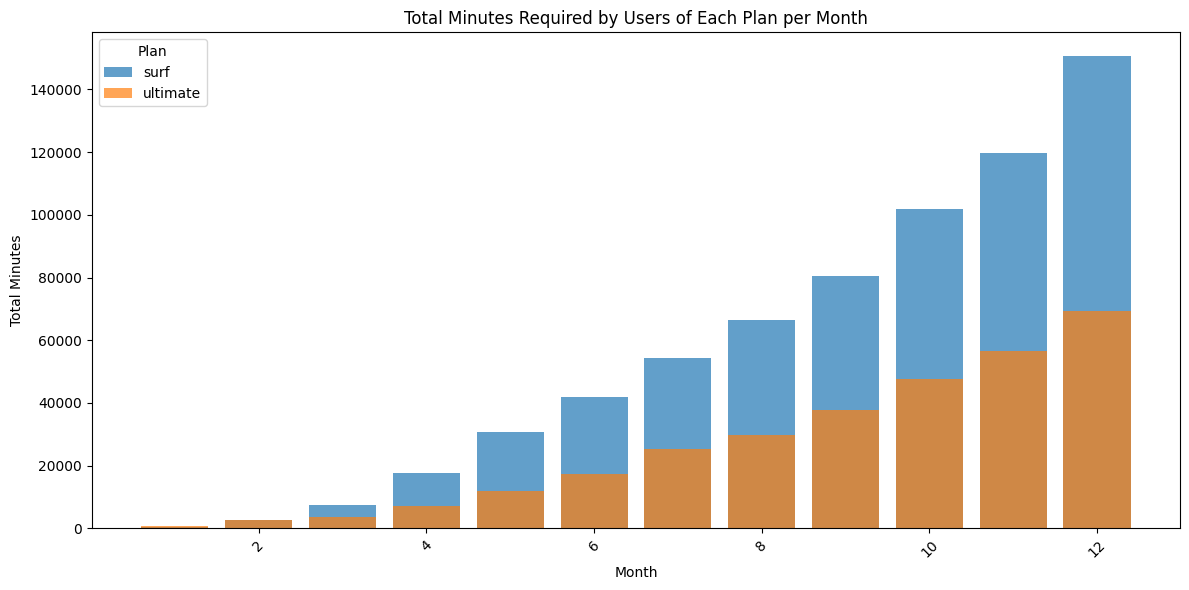

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Grouping by plan and month, then calculating the total duration of calls
total_minutes = final_data.groupby(['plan', 'month'])['total_duration'].sum().reset_index()

# Creating a histogram
plt.figure(figsize=(12, 6))

# Plotting each plan separately
for plan in total_minutes['plan'].unique():
    subset = total_minutes[total_minutes['plan'] == plan]
    plt.bar(subset['month'], subset['total_duration'], label=plan, alpha=0.7)

# Customizing the plot
plt.title('Total Minutes Required by Users of Each Plan per Month')
plt.xlabel('Month')
plt.ylabel('Total Minutes')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [32]:
# Calculate the mean and the variance of the monthly call duration
surf_total_durations = final_data.loc[final_data['plan'] == 'surf', 'total_duration']
ultimate_total_durations = final_data.loc[final_data['plan'] == 'ultimate', 'total_duration']

surf_mean = surf_total_durations.mean()
surf_variance = surf_total_durations.var()

ultimate_mean = ultimate_total_durations.mean()
ultimate_variance = ultimate_total_durations.var()

print(f"Surf plan: Mean = {surf_mean}, Variance = {surf_variance}")
print(f"Ultimate plan: Mean = {ultimate_mean}, Variance = {ultimate_variance}")

Surf plan: Mean = 436.51974110032364, Variance = 52571.06324345624
Ultimate plan: Mean = 434.67601683029454, Variance = 56573.63224703341


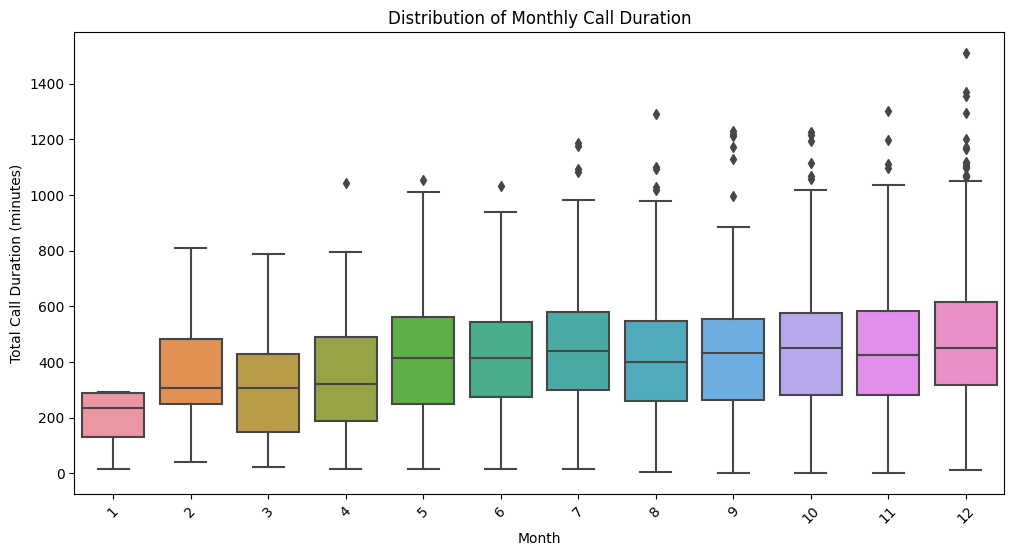

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Grouping by month and calculate total call duration
monthly_duration = final_data.groupby(['month'])['total_duration'].sum().reset_index()

# Creating a boxplot
plt.figure(figsize=(12, 6))

# Using Seaborn for a better aesthetic
sns.boxplot(x='month', y='total_duration', data=final_data)

# Customizing the plot
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Total Call Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]
Student's Comments:

The average call duration for "surf" plan users is consistently higher than the "ultimate" plan users across all months.
The gap between the two plans widens over time, with the "surf" plan users having an average call duration of around 450 minutes, while the "ultimate" plan users have an average of around 350 minutes.


The boxplot shows a wider distribution and higher median call duration for the "surf" plan users compared to the "ultimate" plan users.
The "surf" plan users have a larger number of outliers with very high call durations, indicating more variability in their usage patterns.
The "ultimate" plan users have a more compact distribution, suggesting more consistent and lower call durations overall.

The "surf" plan users consistently require more total minutes per month compared to the "ultimate" plan users.
The gap between the two plans widens significantly as the months progress, with "surf" plan users requiring over 100,000 minutes by the later months, while "ultimate" plan users require around 60,000 minutes.

### Messages

In [34]:
display(final_data.head())

,user_id,month,calls_made,total_duration,messages_sent,total_mb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,8,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,9,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,50.706055


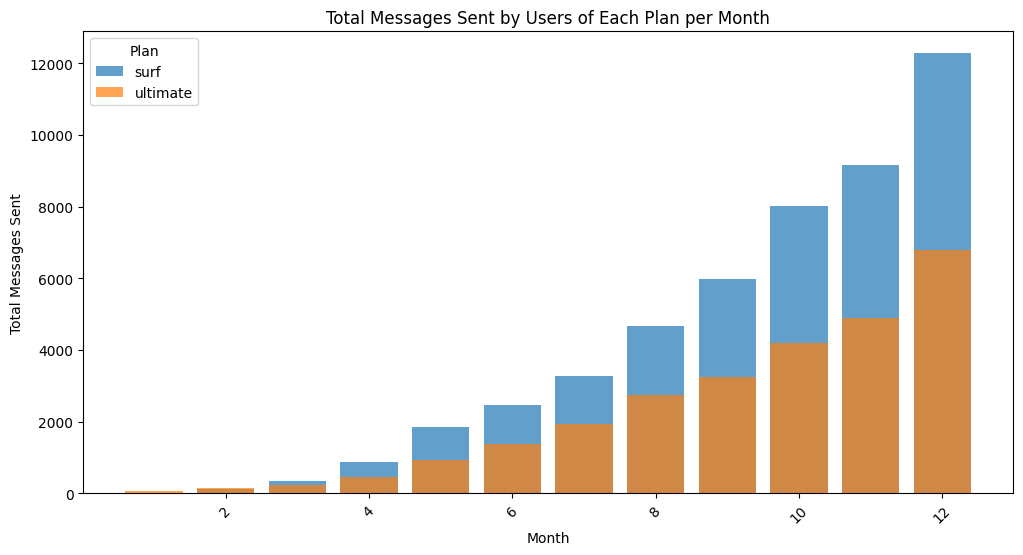

In [35]:
# Compare the number of messages users of each plan tend to send each month.

# Grouping by plan and month, then calculating the total messages sent
total_messages = final_data.groupby(['plan', 'month'])['messages_sent'].sum().reset_index()

# Creating a histogram
plt.figure(figsize=(12, 6))

# Plotting each plan separately
for plan in total_messages['plan'].unique():
    subset = total_messages[total_messages['plan'] == plan]
    plt.bar(subset['month'], subset['messages_sent'], label=plan, alpha=0.7)

# Customizing the plot
plt.title('Total Messages Sent by Users of Each Plan per Month')
plt.xlabel('Month')
plt.ylabel('Total Messages Sent')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

There is clear difference in the total messages sent by users on the 'surf' and 'ultimate' plans. Users on the 'ultimate' plan consistently send more messages than users on the 'surf' plan.

The number of messages sent by users on both plans increases over time, but the growth rate is more pronounced for the 'ultimate' plan. 


### Internet

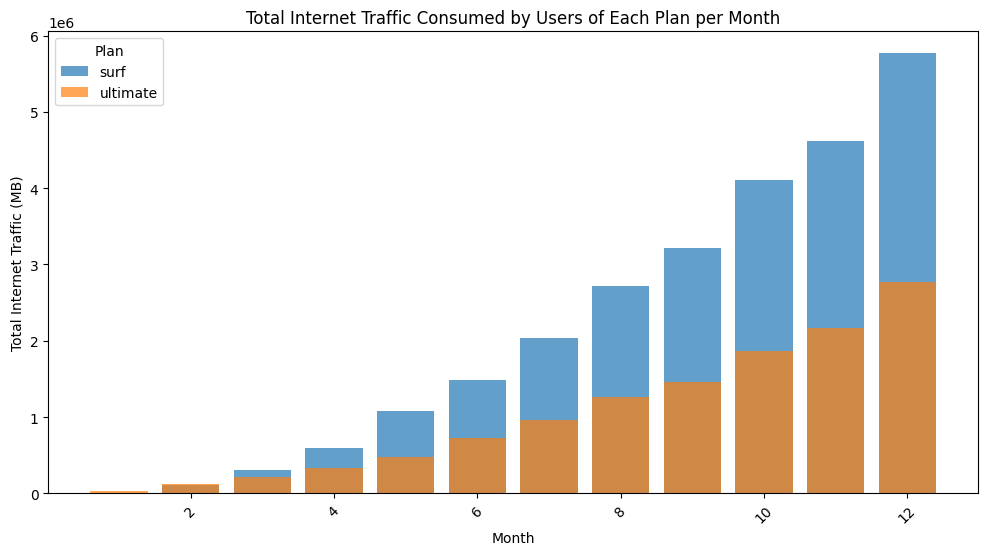

In [36]:
# Compare the amount of internet traffic consumed by users per plan
# Grouping by plan and month, then calculating the total internet traffic consumed
total_traffic = final_data.groupby(['plan', 'month'])['total_mb_used'].sum().reset_index()

# Creating a histogram
plt.figure(figsize=(12, 6))

# Plotting each plan separately
for plan in total_traffic['plan'].unique():
    subset = total_traffic[total_traffic['plan'] == plan]
    plt.bar(subset['month'], subset['total_mb_used'], label=plan, alpha=0.7)

# Customizing the plot
plt.title('Total Internet Traffic Consumed by Users of Each Plan per Month')
plt.xlabel('Month')
plt.ylabel('Total Internet Traffic (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?] 

Users on the 'ultimate' plan consistently consume more internet traffic than users on the 'surf' plan across all months.

The internet traffic consumption for both plans increases over time, but the growth rate is more pronounced for the 'ultimate' plan.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [37]:
display(final_data.head())

,user_id,month,calls_made,total_duration,messages_sent,total_mb_used,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,8,27.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,9,49.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,10,65.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,11,64.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,50,15360,500,20,10,0.03,0.03,surf,50.706055


In [38]:
# Calculating the average monthly revenue for the 'surf' plan
surf_revenue = final_data[final_data['plan_name'] == 'surf']['monthly_revenue'].mean()
print(f"Average monthly revenue for 'surf' plan: {surf_revenue:.2f}")

# Calculating the average monthly revenue for the 'ultimate' plan
ultimate_revenue = final_data[final_data['plan_name'] == 'ultimate']['monthly_revenue'].mean()
print(f"Average monthly revenue for 'ultimate' plan: {ultimate_revenue:.2f}")

Average monthly revenue for 'surf' plan: 55.83
Average monthly revenue for 'ultimate' plan: 72.12


In [39]:
# Calculate the revenue variance for the 'surf' plan
surf_revenue_variance = final_data[final_data['plan_name'] == 'surf']['monthly_revenue'].var()
print(f"Revenue variance for 'surf' plan: {surf_revenue_variance:.2f}")

# Calculate the revenue variance for the 'ultimate' plan
ultimate_revenue_variance = final_data[final_data['plan_name'] == 'ultimate']['monthly_revenue'].var()
print(f"Revenue variance for 'ultimate' plan: {ultimate_revenue_variance:.2f}")


surf_revenue_std = final_data.loc[final_data['plan_name'] == 'surf', 'monthly_revenue'].std()
ultimate_revenue_std = final_data.loc[final_data['plan_name'] == 'ultimate', 'monthly_revenue'].std()

print(f"Standard deviation for 'surf' plan: {surf_revenue_std:.2f}")
print(f"Standard deviation for 'ultimate' plan: {ultimate_revenue_std:.2f}")

Revenue variance for 'surf' plan: 2810.97
Revenue variance for 'ultimate' plan: 115.97
Standard deviation for 'surf' plan: 53.02
Standard deviation for 'ultimate' plan: 10.77


Revenue range for 'surf' plan: 544.97
Revenue range for 'ultimate' plan: 108.52


<Figure size 800x600 with 0 Axes>

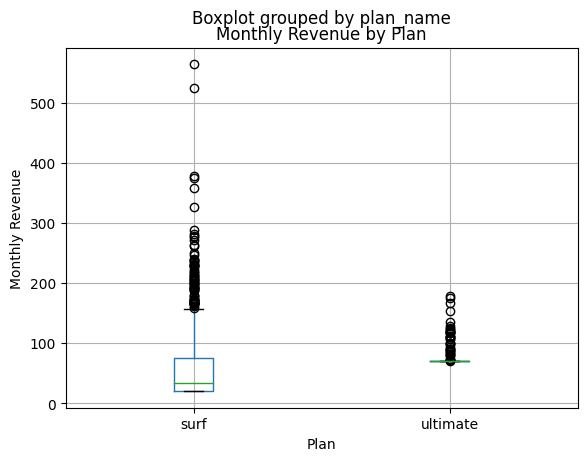

In [40]:
# Calculating the revenue range for the 'surf' plan
surf_revenue_max = final_data[final_data['plan_name'] == 'surf']['monthly_revenue'].max()
surf_revenue_min = final_data[final_data['plan_name'] == 'surf']['monthly_revenue'].min()
surf_revenue_range = surf_revenue_max - surf_revenue_min
print(f"Revenue range for 'surf' plan: {surf_revenue_range:.2f}")

# Calculating the revenue range for the 'ultimate' plan
ultimate_revenue_max = final_data[final_data['plan_name'] == 'ultimate']['monthly_revenue'].max()
ultimate_revenue_min = final_data[final_data['plan_name'] == 'ultimate']['monthly_revenue'].min()
ultimate_revenue_range = ultimate_revenue_max - ultimate_revenue_min
print(f"Revenue range for 'ultimate' plan: {ultimate_revenue_range:.2f}")

plt.figure(figsize=(8, 6))
final_data.boxplot(column='monthly_revenue', by='plan_name')
plt.title('Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()

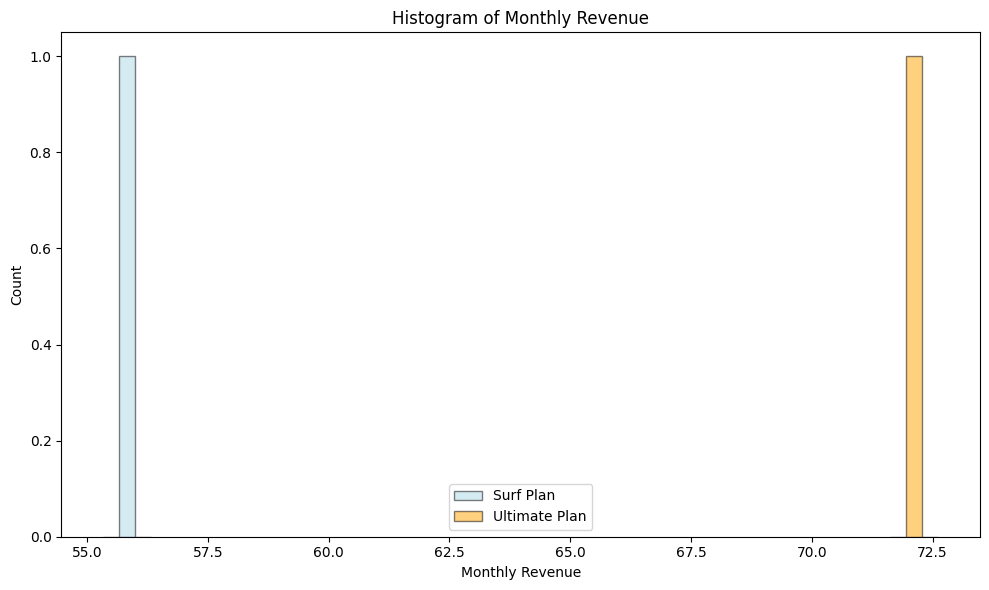

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for 'surf' plan
ax.hist(surf_revenue, bins=3, edgecolor='black', facecolor='lightblue', alpha=0.5, label='Surf Plan')

# Histogram for 'ultimate' plan
ax.hist(ultimate_revenue, bins=3, edgecolor='black', facecolor='orange', alpha=0.5, label='Ultimate Plan')

# Set title and axis labels
ax.set_title('Histogram of Monthly Revenue')
ax.set_xlabel('Monthly Revenue')
ax.set_ylabel('Count')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

1.	Null Hypothesis (H0): The average revenue from users of Ultimate and Surf calling plans is the same.
2.	Alternative Hypothesis (H1): The average revenue from users of Ultimate and Surf calling plans is different.



In [42]:
# Test the hypotheses
# Hypothesis 1: Comparing average revenue between 'surf' and 'ultimate' plans
surf_revenue = final_data.loc[final_data['plan_name'] == 'surf', 'monthly_revenue']
ultimate_revenue = final_data.loc[final_data['plan_name'] == 'ultimate', 'monthly_revenue']

t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue)

if p_value < 0.05:
    print("Reject the null hypothesis. The average revenue from users of Ultimate and Surf calling plans is different.")
else:
    print("Fail to reject the null hypothesis. The average revenue from users of Ultimate and Surf calling plans is the same.")

Reject the null hypothesis. The average revenue from users of Ultimate and Surf calling plans is different.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.] 

3.	Null Hypothesis (H0): The average revenue from users in the NY-NJ area is the same as users from other regions.
4.	Alternative Hypothesis (H1): The average revenue from users in the NY-NJ area is different from users from other regions.

In [43]:
# Hypothesis 2: Comparing average revenue between NY-NJ area and other regions
ny_nj_revenue = final_data.loc[final_data['city'].str.contains('NY-NJ'), 'monthly_revenue']
other_regions_revenue = final_data.loc[~final_data['city'].str.contains('NY-NJ'), 'monthly_revenue']

t_stat, p_value = ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

if p_value < 0.05:
    print("Reject the null hypothesis. The average revenue from users in the NY-NJ area is different from users from other regions.")
else:
    print("Fail to reject the null hypothesis. The average revenue from users in the NY-NJ area is the same as users from other regions.")

Reject the null hypothesis. The average revenue from users in the NY-NJ area is different from users from other regions.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

In this project, I aimed to compare the average monthly revenue between the 'surf' and 'ultimate' calling plans, as well as the differences between the NY-NJ area and the other areas. The goal of comparing the monthly average revenues was to gain insights that would inform the marketing department which prepaid plan brings in more revenue. I extracted the monthly revenue data for the 'surf' and 'ultimate' plans using boolean indexing on the 'plan_name' column. To compare the average revenue between the two plans, I performed an independent samples t-test using the ttest_ind() function from the scipy.stats module. 

For the second hypothesys testing I used boolean indexing on the 'city' column to extract the monthly revenue data for the NY-NJ area and other regions. For testing both hypothesys I used the the ttest_ind funtion. The result of the analyses showed that: we can reject the null hypothesis. The average revenue from users of Ultimate and Surf calling plans is different and that: we can reject the null hypothesis. The average revenue from users in the NY-NJ area is different from users from other regions.
